# Trabajo Práctico 2 : Críticas cinematográficas

En este trabajo práctico vamos a utilizar una colección de críticas cinematográficas en idioma español y vamos a tratar de identificarla como positiva o negativa.

In [1]:
#Datos
import pandas as pd

#Plots
import sklearn as sk
import seaborn as sns
import matplotlib.pyplot as plt

#Modelado
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import recall_score, accuracy_score,f1_score, confusion_matrix, classification_report

In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [3]:
# Cargo el data set
direc = "/content/gdrive/MyDrive/TP2/train.csv"
direc_test = "https://raw.githubusercontent.com/Akselas/7506R-1C2023-GRUPO26/main/TP2/test.csv"

In [13]:
df_test = pd.read_csv(direc_test)
df = pd.read_csv(direc)
#df_test[400000]

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   ID           50000 non-null  int64 
 1   review_es    50000 non-null  object
 2   sentimiento  50000 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.1+ MB


In [ ]:
df["sentimiento"]

0        positivo
1        positivo
2        positivo
3        negativo
4        positivo
           ...   
49995    positivo
49996    negativo
49997    negativo
49998    negativo
49999    negativo
Name: sentimiento, Length: 50000, dtype: object

In [ ]:
df.head()

,ID,review_es,sentimiento
0,0,Uno de los otros críticos ha mencionado que de...,positivo
1,1,Una pequeña pequeña producción.La técnica de f...,positivo
2,2,Pensé que esta era una manera maravillosa de p...,positivo
3,3,"Básicamente, hay una familia donde un niño peq...",negativo
4,4,"El ""amor en el tiempo"" de Petter Mattei es una...",positivo


In [ ]:
df.isna().sum()

ID             0
review_es      0
sentimiento    0
dtype: int64

No tiene entradas nulas

In [ ]:
### 250,
texto= df['review_es'][37407]
texto

"For anyone that loves predictable movies with an awful soundtrack, lack of dialogue, clichés up the wazoo, and also stereotypes that just happens to be typical of an American film, look no farther DreamWorks whether wanted to save money on acquiring voice talent, or really wanted to create an animated episode of National Geographic; either way, they succeeded in delivering a rather bland and boring movie Spirit: Stallion of the Cimarron is a bore fest that sends mixed signals to kids and adults, and also fails to entertain despite the oh-so-cutesy theme of animals triumphing over humans After looking past the wonderful animations, what you have remaining is nothing but a big messSpirit is about a stallion that from the beginning of the film looks like quite a handful, as he is a horse that cannot be tamed, calmed, nor controlled Because of this, he rises and becomes the leader of his group of high-spirited horses, which includes his mom But, his life of freedom and running around come

In [ ]:
#!pip install googletrans

In [ ]:
#from googletrans import Translator
#translator = Translator()
#translator.detect('This sentence is written in English.')

# Preprocesamiento de Bayes Naive

Creo una nueva columna 'sent_val' que tendra como valores:

Negativo = 0
Positivo = 1

In [14]:
df_copia = df.copy()

In [15]:
df_copia["sent_val"] = df_copia["sentimiento"].apply(lambda sentimiento: 0 if sentimiento == 'negativo' else 1)

In [16]:
#Convierte la columna review_es a lowercase
df_copia["review_es"] = df_copia["review_es"].str.lower()

In [ ]:
df_copia.sample(n=5)

Declaro las Stopwords

In [17]:
import requests
# Abrir el archivo en modo lectura
ruta_de_stopwords = 'https://raw.githubusercontent.com/Alir3z4/stop-words/master/spanish.txt'
#agrego stop word en ingles, a ver si mejora algo
ruta_de_stopwords_ingles = "https://gist.githubusercontent.com/ZohebAbai/513218c3468130eacff6481f424e4e64/raw/b70776f341a148293ff277afa0d0302c8c38f7e2/gist_stopwords.txt"
response_ingles = requests.get(ruta_de_stopwords_ingles)
contenido_ingles = response_ingles.text
stop_words_ingles = contenido_ingles.split(",")

response = requests.get(ruta_de_stopwords)
contenido = response.text
stop_words = contenido.split("\n")
mas_stop_words = ['La', 'En', 'El', 'Oh','oh', 'Al'] #Hay que agregar mas stop words porque la lista se queda corta
stop_words += mas_stop_words

stop_words += stop_words_ingles

stop_words.remove("bien")
stop_words.remove("buena")
stop_words.remove("buenas")
stop_words.remove("bueno")
print(len(stop_words))

1771


In [18]:
#Por ahora dropeo la columna "ID" y sentimiento ya que vamos a usar la columna de reviews y la columna sent_val
df_copia.drop("ID", axis=1, inplace=True)
df_copia.drop("sentimiento", axis=1, inplace=True)

In [19]:
#Creo el dataset de train y el de la variable objetivo
reviews_train = df_copia["review_es"].copy()
reviews_test = df_test["review_es"].copy()
feels = df_copia["sent_val"].copy()

Stemmer (puede demorar hasta 5 mins)

In [ ]:
from nltk.stem import PorterStemmer
stemmer = PorterStemmer()
# Definir una función para aplicar stemming a un texto
def apply_stemming(text):
    words = text.split()
    stemmed_words = [stemmer.stem(word) for word in words]
    return ' '.join(stemmed_words)
reviews_train_stemmed = reviews_train.apply(apply_stemming)

Vectorizer

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
# Transformación del texto en características numéricas
vectorizer = TfidfVectorizer(lowercase = False, stop_words = stop_words)
matriz_reviews = vectorizer.fit_transform(reviews_train_stemmed)

/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:409: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['articl', 'mon'] not in stop_words.
  warnings.warn(


Split de datos en train y test

In [ ]:
#Creo conjuntos de train y test
x_train, x_test, y_train, y_test = train_test_split(matriz_reviews, feels, test_size=0.3, random_state=0)

# Bayes Naive

## Entrenamiento

In [ ]:
# Creación de la instancia del clasificador, falta buscar hiperparametros, pero estuve buscando y la verdad no cambia mucho
naive_bayes = MultinomialNB(alpha=1.7, fit_prior= True)

# Entrenamiento del modelo
naive_bayes.fit(x_train, y_train)

# Realización de predicciones en los datos de prueba
y_pred = naive_bayes.predict(x_test)


# Evaluacion
accuracy = accuracy_score(y_test, y_pred)
print("Precisión del modelo: {:.3f}".format(accuracy))

Precisión del modelo: 0.854


In [ ]:
print(x_train)

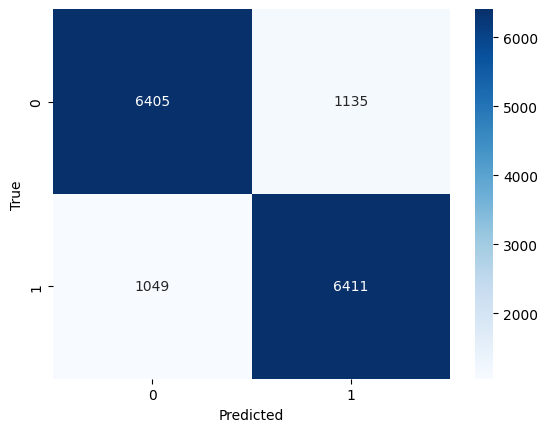

              precision    recall  f1-score   support

           0       0.86      0.85      0.85      7540
           1       0.85      0.86      0.85      7460

    accuracy                           0.85     15000
   macro avg       0.85      0.85      0.85     15000
weighted avg       0.85      0.85      0.85     15000



In [ ]:

tabla = confusion_matrix(y_test, y_pred)

sns.heatmap(tabla, cmap = 'Blues',annot = True, fmt = 'g')
plt.xlabel("Predicted")
plt.ylabel("True")

plt.show()
print(classification_report(y_test, y_pred))

##Busqueda de hiperparametros

In [ ]:
import numpy as np
import xgboost as xgb
from sklearn.model_selection import RandomizedSearchCV

#Grilla de Parámetros
params_grid={ 'alpha': [0.1, 0.3, 0.5, 1.0, 2.0, 4.0, 5.0, 7.0], 'fit_prior':[True, False], 'force_alpha':[True,False]
             }

#Clasificador bayes naive
opt_naive_bayes = MultinomialNB()

#Random Search con 10 Folds y 10 iteraciones
rand = RandomizedSearchCV(opt_naive_bayes, params_grid, cv=5, scoring='accuracy', n_iter=10, random_state=69)
rand.fit(x_train, y_train)
rand.cv_results_['mean_test_score']

array([0.85277143, 0.8532    , 0.85325714, 0.85262857, 0.85322857,
       0.85228571, 0.8532    , 0.85282857, 0.84857143, 0.85277143])

In [ ]:
print(rand.best_score_)
rand.best_params_

0.8532571428571429


{'force_alpha': False, 'fit_prior': True, 'alpha': 1.0}

##Entrenamiento del mejor modelo

In [ ]:
best_params_bayes = MultinomialNB(alpha=1.0, fit_prior= True, force_alpha= False)
# Entrenamiento del modelo
best_params_bayes.fit(x_train, y_train)

# Realización de predicciones en los datos de prueba
y_pred = best_params_bayes.predict(x_test)


# Evaluacion
accuracy = accuracy_score(y_test, y_pred)
print("Precisión del modelo: {:.3f}".format(accuracy))


Precisión del modelo: 0.854


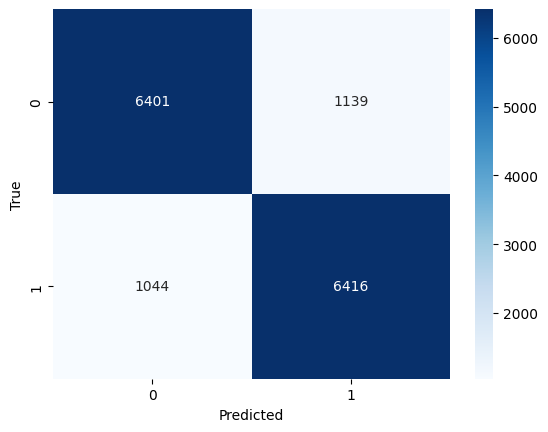

              precision    recall  f1-score   support

           0       0.86      0.85      0.85      7540
           1       0.85      0.86      0.85      7460

    accuracy                           0.85     15000
   macro avg       0.85      0.85      0.85     15000
weighted avg       0.85      0.85      0.85     15000



In [ ]:
#Grafico
tabla = confusion_matrix(y_test, y_pred)

sns.heatmap(tabla, cmap = 'Blues',annot = True, fmt = 'g')
plt.xlabel("Predicted")
plt.ylabel("True")

plt.show()
print(classification_report(y_test, y_pred))

## Prediccion

In [ ]:
df_test.head()

In [ ]:
#Preparamos el conjunto de test
test_id = df_test.ID.copy()
df_test_copia = df_test.drop('ID', axis=1)
df_test_copia["review_es"] = df_test_copia["review_es"].str.lower()
reviews_test = df_test_copia["review_es"]

reviews_test_stemmed = reviews_test.apply(apply_stemming)
test_reviews = vectorizer.transform(reviews_test_stemmed)

In [ ]:
y_pred_nuevo = best_params_bayes.predict(test_reviews)

In [ ]:
submit =  pd.DataFrame(zip(test_id,y_pred_nuevo),columns=['ID','sentimiento'])
submit["sentimiento"] = submit["sentimiento"].apply(lambda sentimiento: 'negativo' if sentimiento == 0 else 'positivo')
submit.sample(n=5)

,ID,sentimiento
445,60445,negativo
3677,63677,negativo
3267,63267,positivo
5322,65322,positivo
1117,61117,positivo


In [ ]:
submit.to_csv('./bayes_naive_submit.csv',index=False)

##Creacion del modelo

In [ ]:
from joblib import dump
dump(best_params_bayes, 'naive_bayes_tp2.joblib')

from joblib import load
naive_bayes_prueba = load('naive_bayes_tp2.joblib')
#naive_bayes_prueba.predict(df_test_copia)
arr = naive_bayes_prueba.predict(test_reviews)

#XGBoost


##Preprocesamiento

In [ ]:
#Datos
import pandas as pd

#Plots
import sklearn as sk
import seaborn as sns
import matplotlib.pyplot as plt

#Modelado
from sklearn.model_selection import train_test_split
from sklearn.metrics import recall_score, accuracy_score,f1_score, confusion_matrix, classification_report
import numpy as np
from nltk.corpus import stopwords
import nltk
from nltk.stem import PorterStemmer
nltk.download('wordnet')
nltk.download('stopwords')

data_test = pd.read_csv(direc_test)
data_train = pd.read_csv(direc)

reviews_test = data_test['review_es']
reviews_train = data_train['review_es']
sentiments_train = data_train['sentimiento']


stopwords_set = set(stopwords.words('spanish')) | set(stopwords.words('english'))
def remove_stopwords(text):
     words = text.split()
     filtered_words = [word for word in words if word not in stopwords_set]
     return ' '.join(filtered_words)
reviews_train_clean = reviews_train.apply(remove_stopwords)


[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer()
matriz_reviews = vectorizer.fit_transform(reviews_train_clean)

In [ ]:
labels_train = sentiments_train.replace({'positivo': 1, 'negativo': 0})

x_trainXG, x_testXG, y_trainXG, y_testXG = train_test_split(matriz_reviews,labels_train, test_size=0.30, random_state=0)

##Entrenamiento (por defecto)

In [ ]:
import xgboost as xgb

xgbmodel = xgb.XGBClassifier(random_state=0,n_estimators=100)
xgbmodel.fit(x_trainXG,y_trainXG)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=0, ...)

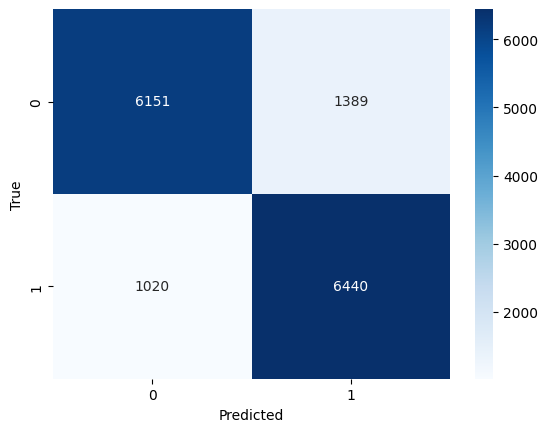

              precision    recall  f1-score   support

           0       0.86      0.82      0.84      7540
           1       0.82      0.86      0.84      7460

    accuracy                           0.84     15000
   macro avg       0.84      0.84      0.84     15000
weighted avg       0.84      0.84      0.84     15000



In [ ]:
y_predic_xgb = xgbmodel.predict(x_testXG)

cm = confusion_matrix(y_testXG,y_predic_xgb)

sns.heatmap(cm, cmap = 'Blues',annot = True, fmt = 'g')
plt.xlabel("Predicted")
plt.ylabel("True")

plt.show()
print(classification_report(y_testXG, y_predic_xgb))


##Busqueda de hiperparametros

In [ ]:
import numpy as np
import xgboost as xgb
from sklearn.model_selection import RandomizedSearchCV

#Grilla de Parámetros
params_grid={ 'learning_rate':np.linspace(0.3,0.5,5),
              'n_estimators':range(500,600),
              'max_depth':range(1,5),
             'objective':['binary:logistic','reg:logistic']
             }




#Clasificador xgb
xgb_model = xgb.XGBClassifier(random_state=0)

#Random Search con 10 Folds y 10 iteraciones
rand = RandomizedSearchCV(xgb_model, params_grid, cv=2, scoring='accuracy', n_iter=3, random_state=5)

rand.fit(x_trainXG, y_trainXG)
rand.cv_results_['mean_test_score']

array([0.85322857, 0.85345714, 0.84557143])

In [ ]:
rand.best_score_

0.8521142857142858

In [ ]:
rand.best_params_

{'objective': 'binary:logistic',
 'n_estimators': 527,
 'max_depth': 4,
 'learning_rate': 0.4}

{'n_estimators': 506, 'max_depth': 3, 'learning_rate': 0.3,'objective':['binary:logistic'] } stemming
{'objective': 'binary:logistic',
 'n_estimators': 527,
 'max_depth': 4,
 'learning_rate': 0.4} stopword

In [ ]:
rand.cv_results_['params']

[{'n_estimators': 596, 'max_depth': 3, 'learning_rate': 0.35},
 {'n_estimators': 598, 'max_depth': 4, 'learning_rate': 0.3},
 {'n_estimators': 580, 'max_depth': 2, 'learning_rate': 0.45},
 {'n_estimators': 583, 'max_depth': 3, 'learning_rate': 0.3},
 {'n_estimators': 578, 'max_depth': 1, 'learning_rate': 0.3}]

##Entrenando el mejor modelo que se encontro

In [ ]:
xgb_best_model = xgb.XGBClassifier(objective= 'binary:logistic',n_estimators=527,max_depth= 4,learning_rate= 0.4 )
xgb_best_model.fit(x_trainXG,y_trainXG)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.4, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=4, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=527, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [ ]:
predict_y_test = xgb_best_model.predict(x_testXG)

              precision    recall  f1-score   support

           0       0.88      0.85      0.86      7540
           1       0.85      0.88      0.87      7460

    accuracy                           0.87     15000
   macro avg       0.87      0.87      0.87     15000
weighted avg       0.87      0.87      0.87     15000



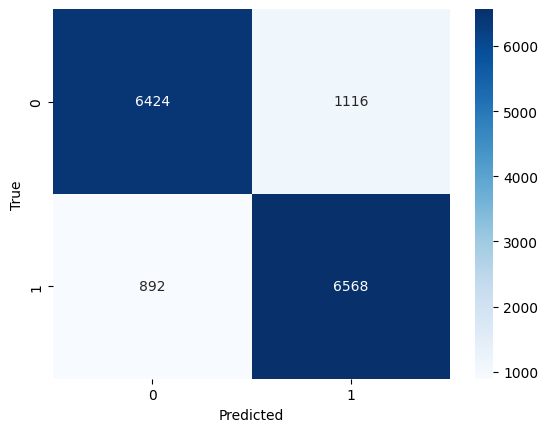

In [ ]:
tabla = confusion_matrix(y_testXG, predict_y_test)

print(classification_report(y_testXG,predict_y_test))
sns.heatmap(tabla, cmap = 'Blues',annot = True, fmt = 'g')
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

##Prediccion

In [ ]:
#Preparamos el conjunto de test
test_id = df_test.ID.copy()
df_test_copia = df_test.drop('ID', axis=1)
df_test_copia["review_es"] = df_test_copia["review_es"].str.lower()
reviews_test = df_test_copia["review_es"]



In [ ]:
reviews_test_clean = reviews_test.apply(remove_stopwords)

test_reviews = vectorizer.transform(reviews_test_clean)

In [ ]:
y_valid_xgb = xgb_best_model.predict(test_reviews)

In [ ]:
submit_xgb =  pd.DataFrame(zip(test_id,y_valid_xgb),columns=['ID','sentimiento'])
submit_xgb["sentimiento"] = submit_xgb["sentimiento"].apply(lambda sentimiento: 'negativo' if sentimiento == 0 else 'positivo')
submit_xgb.sample(n=5)

,ID,sentimiento
4667,64667,negativo
1214,61214,positivo
8307,68307,positivo
6957,66957,negativo
204,60204,negativo


In [ ]:
submit_xgb.to_csv('./best_xgb_submit_stopword.csv',index=False)

##Construccion del modelo

In [ ]:
from joblib import dump
dump(xgb_best_model, 'xgboost_tp2.joblib')

from joblib import load
xgboost_prueba = load('xgboost_tp2.joblib')
xgboost_prueba.predict(x_testXG)

array([1, 0, 1, ..., 1, 1, 0])

# Random Forest

##Preprocesamiento

In [21]:
nltk.download('wordnet')

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer

reviews_train = df_copia["review_es"].copy()
feels = df_copia["sent_val"].copy()


lemmatizer = WordNetLemmatizer()

# Definir una función para aplicar stemming a un texto
def apply_lemmatizing(text):
    words = text.split()
    lemmatized_words = [lemmatizer.lemmatize(word) for word in words]
    return ' '.join(lemmatized_words)


#Aplico stemming a todas las reseñas
reviews_train_lemmatized = reviews_train.apply(apply_lemmatizing)

#Utilizo CountVectorizer para remover las stopwords y transformar las reseñas a forma numérica
vectorizer = CountVectorizer(lowercase = False, stop_words = stop_words)
matriz_reviews = vectorizer.fit_transform(reviews_train_lemmatized)

#Divido el dataset en conjuntos de train y test
x_train, x_test, y_train, y_test = train_test_split(matriz_reviews, feels, test_size=0.3, random_state=0)

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:409: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['articl', 'mon'] not in stop_words.
  warnings.warn(


## Entrenamiento (Por defecto)

In [ ]:
from sklearn.ensemble import RandomForestClassifier

random_forest_default = RandomForestClassifier()

random_forest_default.fit(x_train,y_train)

y_predict_test_default = random_forest_default.predict(x_test)

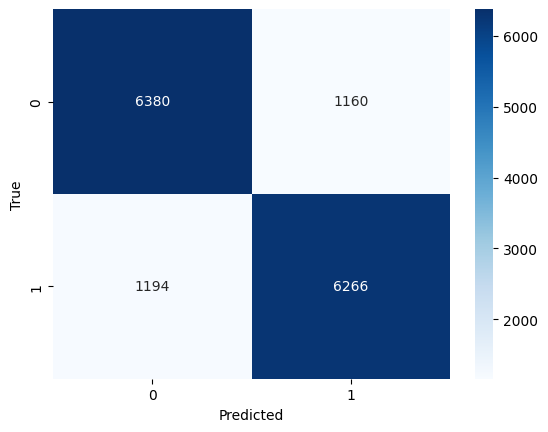

In [ ]:
tabla = confusion_matrix(y_test, y_predict_test_default)

sns.heatmap(tabla, cmap = 'Blues',annot = True, fmt = 'g')
plt.xlabel("Predicted")
plt.ylabel("True")

plt.show()

In [ ]:
print(classification_report(y_test, y_predict_test_default))

              precision    recall  f1-score   support

           0       0.84      0.85      0.84      7540
           1       0.84      0.84      0.84      7460

    accuracy                           0.84     15000
   macro avg       0.84      0.84      0.84     15000
weighted avg       0.84      0.84      0.84     15000



## Entrenamiento con busqueda de hiperparametros

In [ ]:
from sklearn.model_selection import StratifiedKFold, KFold, GridSearchCV, RandomizedSearchCV
from sklearn.metrics import make_scorer
#Pruebo Random Search Cross Validation
#Cantidad de combinaciones que quiero porbar
n=5

#Conjunto de parámetros que quiero usar
params_grid = {'criterion':['gini','entropy'],
               #'min_samples_leaf':[1],
               'min_samples_split': [2,3,4],
               'n_estimators': [70,80,90,100]
               }

#Cantidad de splits para el Cross Validation
folds=3

#Kfold estratificado
kfoldcv = StratifiedKFold(n_splits=folds)

#Clasificador
rf_cv = RandomForestClassifier(random_state=1, n_jobs = -1)

#Metrica que quiero optimizar F1 Score
scorer_fn = make_scorer(sk.metrics.f1_score)

#Random Search Cross Validation
randomcv = RandomizedSearchCV(estimator=rf_cv,
                              param_distributions = params_grid,
                              scoring=scorer_fn,
                              cv=kfoldcv,
                              n_iter=n)

#Busco los hiperparamtros que optimizan F1 Score
randomcv.fit(x_train,y_train);

In [ ]:
randomcv.best_score_

0.8444368973256674

In [ ]:
randomcv.best_params_

{'n_estimators': 100, 'min_samples_split': 4, 'criterion': 'entropy'}

In [ ]:
y_predict_test = randomcv.predict(x_test)

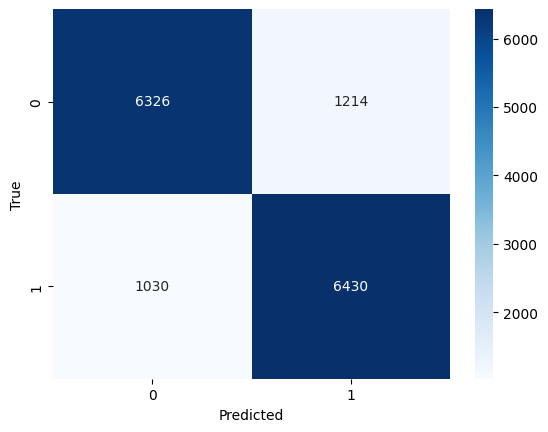

In [ ]:
tabla = confusion_matrix(y_test, y_predict_test)

sns.heatmap(tabla, cmap = 'Blues',annot = True, fmt = 'g')
plt.xlabel("Predicted")
plt.ylabel("True")

plt.show()

In [ ]:
print(classification_report(y_test, y_predict_test))

              precision    recall  f1-score   support

           0       0.86      0.84      0.85      7540
           1       0.84      0.86      0.85      7460

    accuracy                           0.85     15000
   macro avg       0.85      0.85      0.85     15000
weighted avg       0.85      0.85      0.85     15000



### Entrenamiento con los mejores parametros

In [26]:
from sklearn.ensemble import RandomForestClassifier


random_forest = RandomForestClassifier(n_estimators = 100, min_samples_split=  4, criterion=  'entropy')

random_forest.fit(x_train,y_train)

y_predict_test_default = random_forest.predict(x_test)

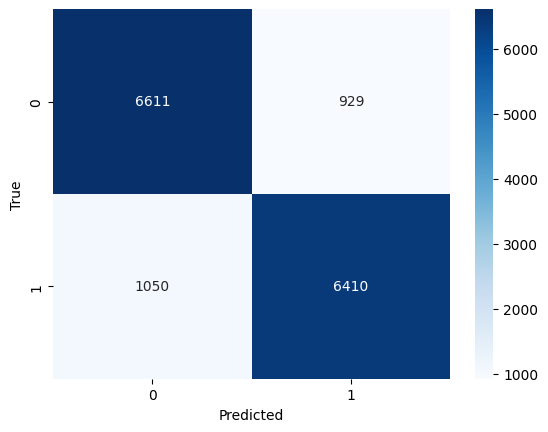

In [25]:
tabla = confusion_matrix(y_test, y_predict_test)

sns.heatmap(tabla, cmap = 'Blues',annot = True, fmt = 'g')
plt.xlabel("Predicted")
plt.ylabel("True")

plt.show()

##Predicción

In [ ]:
test_id = df_test.ID.copy()
df_test_copia = df_test.drop('ID', axis=1)
df_test_copia["review_es"] = df_test_copia["review_es"].str.lower()
reviews_test = df_test_copia["review_es"]

reviews_test_stemmed = reviews_test.apply(apply_lemmatizing)

test_reviews = vectorizer.transform(reviews_test_stemmed)

In [ ]:
y_pred_nuevo = randomcv.predict(test_reviews)

In [ ]:
submit =  pd.DataFrame(zip(test_id,y_pred_nuevo),columns=['ID','sentimiento'])
submit["sentimiento"] = submit["sentimiento"].apply(lambda sentimiento: 'negativo' if sentimiento == 0 else 'positivo')
submit.sample(n=5)

,ID,sentimiento
6970,66970,negativo
459,60459,positivo
3978,63978,positivo
1861,61861,positivo
8252,68252,negativo


In [ ]:
submit.to_csv('./random_forest_submit.csv',index=False)

### Construccion de modelo

In [24]:
from joblib import dump
dump(random_forest, 'random-forest-tp2.joblib')

from joblib import load
model = load('random-forest-tp2.joblib')
model.predict(x_train)

array([1, 0, 1, ..., 1, 0, 1])

# Ensamble

## Preprocesamiento

In [4]:
import numpy as np
import random
from keras.preprocessing.text import Tokenizer
from keras.models import Sequential
from keras.layers import Embedding, LSTM, Dense, Flatten
random.seed(1)
np.random.seed(1)

from nltk.corpus import stopwords
import nltk
from nltk.stem import PorterStemmer
nltk.download('wordnet')
nltk.download('stopwords')

data_test = pd.read_csv(direc_test)
data_train = pd.read_csv(direc)

reviews_test = data_test['review_es']
reviews_train = data_train['review_es']
sentiments_train = data_train['sentimiento']


stopwords_set = set(stopwords.words('spanish')) | set(stopwords.words('english'))
def remove_stopwords(text):
     words = text.split()
     filtered_words = [word for word in words if word not in stopwords_set]
     return ' '.join(filtered_words)
reviews_train_clean = reviews_train.apply(remove_stopwords)

#Aplico stemming al dataset

from nltk.stem import PorterStemmer

stemmer = PorterStemmer()
# Definir una función para aplicar stemming a un texto
def apply_stemming(text):
    words = text.split()
    stemmed_words = [stemmer.stem(word) for word in words]
    return ' '.join(stemmed_words)



reviews_train_stemmed = reviews_train_clean.apply(apply_stemming)
reviews_train_stemmed

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


0        uno crítico mencionado despué ver solo 1 oz ep...
1        una pequeña pequeña producción.la técnica film...
2        pensé manera maravillosa pasar tiempo fin sema...
3        básicamente, familia niño pequeño (jake) piens...
4        el "amor tiempo" petter mattei película visual...
                               ...                        
49995    pensé película hizo buen trabajo derecha.no ta...
49996    mala parcela, mal diálogo, mala actuación, dir...
49997    soy católica enseñada escuela primaria parroqu...
49998    voy tener desacuerdo comentario anterior lado ...
49999    nadi espera película star trek alta artes, fan...
Name: review_es, Length: 50000, dtype: object

In [5]:
reviews_test_stemmed = reviews_test.apply(apply_stemming)

In [6]:
#Tokenizo el dataset, tomando como maximo una cierta cantidad de feautures
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer()
matriz_reviews = vectorizer.fit_transform(reviews_train_stemmed)

## Entrenamiento

In [7]:
labels_train = sentiments_train.replace({'positivo': 1, 'negativo': 0})

x_train, x_test, y_train, y_test = train_test_split(matriz_reviews,labels_train, test_size=0.30, random_state=0)

In [8]:
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
import xgboost as xgb
from keras.models import Sequential
from keras.layers import Embedding, LSTM, Dense, Flatten
random.seed(1)
np.random.seed(1)

#Creo clasificadores
# Rf beste params: 'n_estimators': 100, 'min_samples_split': 4, 'criterion': 'entropy'}
# Xg best params:  {'objective': 'binary:logistic','n_estimators': 527,'max_depth': 4,'learning_rate': 0.4}
# Bayes naive best params: {'force_alpha': False, 'fit_prior': True, 'alpha': 1.0}

xgbmodel = xgb.XGBClassifier(n_estimators= 506, max_depth = 4, learning_rate = 0.4, objective = 'binary:logistic')
rfmodel = RandomForestClassifier(n_estimators= 100, min_samples_split = 4, criterion= 'entropy')
bayesmodel = MultinomialNB(force_alpha = False,fit_prior = True, alpha = 1.0 )


#Creo ensemble de Votación
vot_clf = VotingClassifier(estimators = [('xgb', xgbmodel), ('rnd', rfmodel), ('bn', bayesmodel)], voting = 'soft')

#Entreno el ensemble
vot_clf.fit(x_train, y_train)

VotingClassifier(estimators=[('xgb',
                              XGBClassifier(base_score=None, booster=None,
                                            callbacks=None,
                                            colsample_bylevel=None,
                                            colsample_bynode=None,
                                            colsample_bytree=None,
                                            early_stopping_rounds=None,
                                            enable_categorical=False,
                                            eval_metric=None,
                                            feature_types=None, gamma=None,
                                            gpu_id=None, grow_policy=None,
                                            importance_type=None,
                                            interaction_constraints=None,
                                            learning_ra...
                                            max_cat_threshold=None,
                                            max_cat_to_onehot=None,
                                            max_delta_step=None, max_depth=4,
                                            max_leaves=None,
                                            min_child_weight=None, missing=nan,
                                            monotone_constraints=None,
                                            n_estimators=506, n_jobs=None,
                                            num_parallel_tree=None,
                                            predictor=None, random_state=None, ...)),
                             ('rnd',
                              RandomForestClassifier(criterion='entropy',
                                                     min_samples_split=4)),
                             ('bn', MultinomialNB(force_alpha=False))],
                 voting='soft')

In [9]:
y_predict_test = vot_clf.predict(x_test)

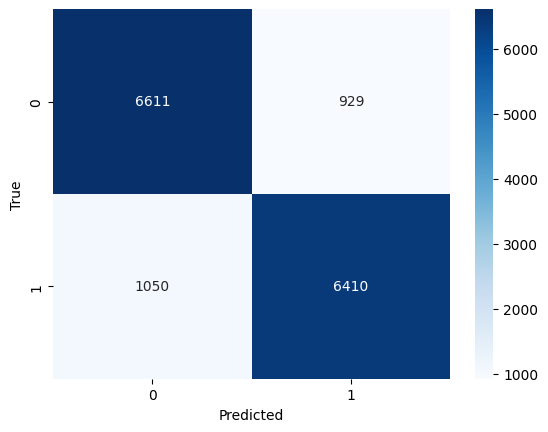

              precision    recall  f1-score   support

           0       0.86      0.88      0.87      7540
           1       0.87      0.86      0.87      7460

    accuracy                           0.87     15000
   macro avg       0.87      0.87      0.87     15000
weighted avg       0.87      0.87      0.87     15000



In [10]:
tabla = confusion_matrix(y_test, y_predict_test)

sns.heatmap(tabla, cmap = 'Blues',annot = True, fmt = 'g')
plt.xlabel("Predicted")
plt.ylabel("True")

plt.show()
print(classification_report(y_test, y_predict_test))

## Prediccion

In [ ]:
#Preparamos el conjunto de test
test_id = df_test.ID.copy()
df_test_copia = df_test.drop('ID', axis=1)
df_test_copia["review_es"] = df_test_copia["review_es"].str.lower()
reviews_test = df_test_copia["review_es"]

In [ ]:
reviews_test_clean = reviews_test.apply(remove_stopwords)
reviews_test_stemmed = reviews_test_clean.apply(apply_stemming)
test_reviews = vectorizer.transform(reviews_test_stemmed)

In [ ]:
y_valid = vot_clf.predict(test_reviews)

In [ ]:
submit =  pd.DataFrame(zip(test_id,y_valid),columns=['ID','sentimiento'])
submit["sentimiento"] = submit["sentimiento"].apply(lambda sentimiento: 'negativo' if sentimiento == 0 else 'positivo')
submit.sample(n=5)

In [ ]:
submit.to_csv('./emsamble_voting.csv',index=False)

In [ ]:
from joblib import dump
dump(vot_clf, 'ensamble_voting.joblib')

from joblib import load
xgboost_prueba = load('ensamble_voting.joblib')
xgboost_prueba.predict(x_test)